# Comparaison entre les différentes tailles de boites, longueurs d'onde etc

## Import packages 

In [1]:
import os

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
from scipy.interpolate import interpolate
from scipy.interpolate import RectBivariateSpline
from scipy.interpolate import griddata
from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import *
from s2_angs import *

/home/acuevas/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import California results

### Ntile=8 and box size = 500

In [2]:
#Load results

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/NSX8_taille500/') 


U_BF_8 = np.load('U_BF.npy')
V_BF_8 = np.load('V_BF.npy')

lat_BF_8=np.load('lat_BF.npy')
lon_BF_8=np.load('lon_BF.npy')

C_BF_8=np.load('C_BF.npy')
C_BF_8 = C_BF_8[C_BF_8 <= 1]


# CF

U_CF_8 = np.load('U_CF.npy')
V_CF_8 = np.load('V_CF.npy')

lat_CF_8=np.load('lat_CF.npy')
lon_CF_8=np.load('lon_CF.npy')

C_CF_8=np.load('C_CF.npy')
C_CF_8 = C_CF_8[C_CF_8 <= 1]

# DF

U_DF_8 = np.load('U_DF.npy')
V_DF_8 = np.load('V_DF.npy')

lat_DF_8=np.load('lat_DF.npy')
lon_DF_8=np.load('lon_DF.npy')

C_DF_8=np.load('C_DF.npy')
C_DF_8 = C_DF_8[C_DF_8 <= 1]

#DG

U_DG_8 = np.load('U_DG.npy')
V_DG_8 = np.load('V_DG.npy')

lat_DG_8=np.load('lat_DG.npy')
lon_DG_8=np.load('lon_DG.npy')

C_DG_8=np.load('C_DG.npy')
C_DG_8 = C_DG_8[C_DG_8 <= 1]


In [22]:
# # Figure 

# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]



# # Définir les coordonnées des points
# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]



# thick=0.003
# nb_pt=2
# scale_quiver=7
# width_front=2.5
# # plt.subplot()
# plt.figure(figsize=(10, 8))

# # Tracé des lignes définies par les coordonnées KML
# plt.plot(x, y, 'k',linewidth=2)
# # Fonction pour extraire les coordonnées x et y
# def extract_coords(front):
#     x_coords = [point[0] for point in front]
#     y_coords = [point[1] for point in front]
#     return x_coords, y_coords

# # Tracer les points
# # plt.figure(figsize=(10, 8))

# # Tracer front1
# x1, y1 = extract_coords(front1)
# plt.plot(x1, y1, 'k',linewidth=width_front)

# # Tracer front2
# x2, y2 = extract_coords(front2)
# plt.plot(x2, y2, 'k',linewidth=width_front)

# # Tracer front3
# x3, y3 = extract_coords(front3)
# plt.plot(x3, y3, 'k',linewidth=width_front)

# # Tracer front4
# x4, y4 = extract_coords(front4)
# plt.plot(x4, y4, 'k',linewidth=width_front)


# # #BF
# plt.quiver(lon_BF_8[::nb_pt], lat_BF_8[::nb_pt], U_BF_8[::nb_pt], V_BF_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
# #CF
# plt.quiver(lon_CF_8[::nb_pt], lat_CF_8[::nb_pt], U_CF_8[::nb_pt], V_CF_8[::nb_pt], scale=scale_quiver,width=thick, color='magenta')

# #DF
# plt.quiver(lon_DF_8[::nb_pt], lat_DF_8[::nb_pt], U_DF_8[::nb_pt], V_DF_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

# #DG
# plt.quiver(lon_DG_8[::nb_pt], lat_DG_8[::nb_pt], U_DG_8[::nb_pt], V_DG_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')


# # echelle

# # Afficher la flèche horizontale
# plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')

# # Afficher la flèche verticale
# plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

# plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

# plt.xlim(-127, -122.5)
# plt.ylim(35.5, 38.5)
# plt.grid(True)

# plt.show()


### Ntile=8; kmin=25 et kmax=65

In [3]:
#Load results

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/NSX8_kmin25_kmax65/') 


U_BF_83 = np.load('U_BF.npy')
V_BF_83 = np.load('V_BF.npy')

lat_BF_83=np.load('lat_BF.npy')
lon_BF_83=np.load('lon_BF.npy')

C_BF_83=np.load('C_BF.npy')
C_BF_83 = C_BF_83[C_BF_83 <= 1]


# CF

U_CF_83 = np.load('U_CF.npy')
V_CF_83 = np.load('V_CF.npy')

lat_CF_83=np.load('lat_CF.npy')
lon_CF_83=np.load('lon_CF.npy')

C_CF_83=np.load('C_CF.npy')
C_CF_83 = C_CF_83[C_CF_83 <= 1]

# DF

U_DF_83 = np.load('U_DF.npy')
V_DF_83 = np.load('V_DF.npy')

lat_DF_83=np.load('lat_DF.npy')
lon_DF_83=np.load('lon_DF.npy')

C_DF_83=np.load('C_DF.npy')
C_DF_83 = C_DF_83[C_DF_83 <= 1]

#DG

U_DG_83 = np.load('U_DG.npy')
V_DG_83 = np.load('V_DG.npy')

lat_DG_83=np.load('lat_DG.npy')
lon_DG_83=np.load('lon_DG.npy')

C_DG_83=np.load('C_DG.npy')
C_DG_83 = C_DG_83[C_DG_83 <= 1]


In [24]:
# # Figure 

# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]



# # Définir les coordonnées des points
# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]



# thick=0.003
# nb_pt=2
# scale_quiver=7
# width_front=2.5
# # plt.subplot()
# plt.figure(figsize=(10, 8))

# # Tracé des lignes définies par les coordonnées KML
# plt.plot(x, y, 'k',linewidth=2)
# # Fonction pour extraire les coordonnées x et y
# def extract_coords(front):
#     x_coords = [point[0] for point in front]
#     y_coords = [point[1] for point in front]
#     return x_coords, y_coords

# # Tracer les points
# # plt.figure(figsize=(10, 8))

# # Tracer front1
# x1, y1 = extract_coords(front1)
# plt.plot(x1, y1, 'k',linewidth=width_front)

# # Tracer front2
# x2, y2 = extract_coords(front2)
# plt.plot(x2, y2, 'k',linewidth=width_front)

# # Tracer front3
# x3, y3 = extract_coords(front3)
# plt.plot(x3, y3, 'k',linewidth=width_front)

# # Tracer front4
# x4, y4 = extract_coords(front4)
# plt.plot(x4, y4, 'k',linewidth=width_front)


# # #BF
# plt.quiver(lon_BF_83[::nb_pt], lat_BF_83[::nb_pt], U_BF_83[::nb_pt], V_BF_83[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
# #CF
# plt.quiver(lon_CF_83[::nb_pt], lat_CF_83[::nb_pt], U_CF_83[::nb_pt], V_CF_83[::nb_pt], scale=scale_quiver,width=thick, color='magenta')

# #DF
# plt.quiver(lon_DF_83[::nb_pt], lat_DF_83[::nb_pt], U_DF_83[::nb_pt], V_DF_83[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

# #DG
# plt.quiver(lon_DG_83[::nb_pt], lat_DG_83[::nb_pt], U_DG_83[::nb_pt], V_DG_83[::nb_pt], scale=scale_quiver, width=thick, color='magenta')


# # echelle

# # Afficher la flèche horizontale
# plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')

# # Afficher la flèche verticale
# plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

# plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

# plt.xlim(-127, -122.5)
# plt.ylim(35.5, 38.5)
# plt.grid(True)

# plt.show()

### Ntile=8; kmin=5 et kmax=15

In [4]:
#Load results

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/NSX8_kmin5_kmax15/') 


U_BF_84 = np.load('U_BF.npy')
V_BF_84 = np.load('V_BF.npy')

lat_BF_84=np.load('lat_BF.npy')
lon_BF_84=np.load('lon_BF.npy')

C_BF_84=np.load('C_BF.npy')
C_BF_84 = C_BF_84[C_BF_84 <= 1]


# CF

U_CF_84 = np.load('U_CF.npy')
V_CF_84 = np.load('V_CF.npy')

lat_CF_84=np.load('lat_CF.npy')
lon_CF_84=np.load('lon_CF.npy')

C_CF_84=np.load('C_CF.npy')
C_CF_84 = C_CF_84[C_CF_84 <= 1]

# DF

U_DF_84 = np.load('U_DF.npy')
V_DF_84 = np.load('V_DF.npy')

lat_DF_84=np.load('lat_DF.npy')
lon_DF_84=np.load('lon_DF.npy')

C_DF_84=np.load('C_DF.npy')
C_DF_84 = C_DF_84[C_DF_84 <= 1]

#DG

U_DG_84 = np.load('U_DG.npy')
V_DG_84 = np.load('V_DG.npy')

lat_DG_84=np.load('lat_DG.npy')
lon_DG_84=np.load('lon_DG.npy')

C_DG_84=np.load('C_DG.npy')
C_DG_84 = C_DG_84[C_DG_84 <= 1]

### Ntile=16 and box size = 500

In [25]:
#Load results

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/NSX16_taille500/') 

U_BF_16 = np.load('U_BF.npy')
V_BF_16 = np.load('V_BF.npy')

lat_BF_16=np.load('lat_BF.npy')
lon_BF_16=np.load('lon_BF.npy')

C_BF_16=np.load('C_BF.npy')
C_BF_16 = C_BF_16[C_BF_16 <= 1]

# CF

U_CF_16 = np.load('U_CF.npy')
V_CF_16 = np.load('V_CF.npy')

lat_CF_16=np.load('lat_CF.npy')
lon_CF_16=np.load('lon_CF.npy')

C_CF_16=np.load('C_CF.npy')
C_CF_16 = C_CF_16[C_CF_16 <= 1]


# DF

U_DF_16 = np.load('U_DF.npy')
V_DF_16 = np.load('V_DF.npy')

lat_DF_16=np.load('lat_DF.npy')
lon_DF_16=np.load('lon_DF.npy')

C_DF_16=np.load('C_DF.npy')
C_DF_16 = C_DF_16[C_DF_16 <= 1]

#DG

U_DG_16 = np.load('U_DG.npy')
V_DG_16 = np.load('V_DG.npy')

lat_DG_16=np.load('lat_DG.npy')
lon_DG_16=np.load('lon_DG.npy')

C_DG_16=np.load('C_DG.npy')
C_DG_16 = C_DG_16[C_DG_16 <= 1]


In [26]:
# # Figure 

# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]



# # Définir les coordonnées des points
# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]



# thick=0.003
# nb_pt=1
# scale_quiver=7
# width_front=2.5
# # plt.subplot()
# plt.figure(figsize=(12, 10))

# # Tracé des lignes définies par les coordonnées KML
# plt.plot(x, y, 'k',linewidth=2)
# # Fonction pour extraire les coordonnées x et y
# def extract_coords(front):
#     x_coords = [point[0] for point in front]
#     y_coords = [point[1] for point in front]
#     return x_coords, y_coords

# # Tracer les points
# # plt.figure(figsize=(10, 8))

# # Tracer front1
# x1, y1 = extract_coords(front1)
# plt.plot(x1, y1, 'k',linewidth=width_front)

# # Tracer front2
# x2, y2 = extract_coords(front2)
# plt.plot(x2, y2, 'k',linewidth=width_front)

# # Tracer front3
# x3, y3 = extract_coords(front3)
# plt.plot(x3, y3, 'k',linewidth=width_front)

# # Tracer front4
# x4, y4 = extract_coords(front4)
# plt.plot(x4, y4, 'k',linewidth=width_front)


# # #BF
# plt.quiver(lon_BF_16[::nb_pt], lat_BF_16[::nb_pt], U_BF_16[::nb_pt], V_BF_16[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
# #CF
# plt.quiver(lon_CF_16[::nb_pt], lat_CF_16[::nb_pt], U_CF_16[::nb_pt], V_CF_16[::nb_pt], scale=scale_quiver,width=thick, color='magenta')

# #DF
# plt.quiver(lon_DF_16[::nb_pt], lat_DF_16[::nb_pt], U_DF_16[::nb_pt], V_DF_16[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

# #DG
# plt.quiver(lon_DG_16[::nb_pt], lat_DG_16[::nb_pt], U_DG_16[::nb_pt], V_DG_16[::nb_pt], scale=scale_quiver, width=thick, color='magenta')


# # echelle

# # Afficher la flèche horizontale
# plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')

# # Afficher la flèche verticale
# plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

# plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

# plt.xlim(-127, -122.5)
# plt.ylim(35.5, 38.5)
# plt.grid(True)

# plt.show()

### Ntile = 8 taile boite=800

In [27]:
#Load results

os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant/Californie/27_04_2023_results/NSX8_taille800/') 


U_BF_82 = np.load('U_BF.npy')
V_BF_82 = np.load('V_BF.npy')

lat_BF_82=np.load('lat_BF.npy')
lon_BF_82=np.load('lon_BF.npy')

C_BF_82=np.load('C_BF.npy')
C_BF_82 = C_BF_82[C_BF_82 <= 1]


# CF

U_CF_82 = np.load('U_CF.npy')
V_CF_82 = np.load('V_CF.npy')

lat_CF_82=np.load('lat_CF.npy')
lon_CF_82=np.load('lon_CF.npy')

C_CF_82=np.load('C_CF.npy')
C_CF_82 = C_CF_82[C_CF_82 <= 1]

# DF

U_DF_82 = np.load('U_DF.npy')
V_DF_82 = np.load('V_DF.npy')

lat_DF_82=np.load('lat_DF.npy')
lon_DF_82=np.load('lon_DF.npy')

C_DF_82=np.load('C_DF.npy')
C_DF_82 = C_DF_82[C_DF_82 <= 1]

#DG

U_DG_82 = np.load('U_DG.npy')
V_DG_82 = np.load('V_DG.npy')

lat_DG_82=np.load('lat_DG.npy')
lon_DG_82=np.load('lon_DG.npy')

C_DG_82=np.load('C_DG.npy')
C_DG_82 = C_DG_82[C_DG_82 <= 1]

In [18]:
# # Figure 

# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]



# # Définir les coordonnées des points
# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]



# thick=0.003
# nb_pt=1
# scale_quiver=7
# width_front=2.5
# # plt.subplot()
# plt.figure(figsize=(10, 8))

# # Tracé des lignes définies par les coordonnées KML
# plt.plot(x, y, 'k',linewidth=2)
# # Fonction pour extraire les coordonnées x et y
# def extract_coords(front):
#     x_coords = [point[0] for point in front]
#     y_coords = [point[1] for point in front]
#     return x_coords, y_coords

# # Tracer les points
# # plt.figure(figsize=(10, 8))

# # Tracer front1
# x1, y1 = extract_coords(front1)
# plt.plot(x1, y1, 'k',linewidth=width_front)

# # Tracer front2
# x2, y2 = extract_coords(front2)
# plt.plot(x2, y2, 'k',linewidth=width_front)

# # Tracer front3
# x3, y3 = extract_coords(front3)
# plt.plot(x3, y3, 'k',linewidth=width_front)

# # Tracer front4
# x4, y4 = extract_coords(front4)
# plt.plot(x4, y4, 'k',linewidth=width_front)


# # #BF
# plt.quiver(lon_BF_82[::nb_pt], lat_BF_82[::nb_pt], U_BF_82[::nb_pt], V_BF_82[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
# #CF
# plt.quiver(lon_CF_82[::nb_pt], lat_CF_82[::nb_pt], U_CF_82[::nb_pt], V_CF_82[::nb_pt], scale=scale_quiver,width=thick, color='magenta')

# #DF
# plt.quiver(lon_DF_82[::nb_pt], lat_DF_82[::nb_pt], U_DF_82[::nb_pt], V_DF_82[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

# #DG
# plt.quiver(lon_DG_82[::nb_pt], lat_DG_82[::nb_pt], U_DG_82[::nb_pt], V_DG_82[::nb_pt], scale=scale_quiver, width=thick, color='magenta')


# # echelle

# # Afficher la flèche horizontale
# plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')

# # Afficher la flèche verticale
# plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

# plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

# plt.xlim(-127, -122.5)
# plt.ylim(35.5, 38.5)
# plt.grid(True)

# plt.show()

## Comparaison en direction

### Différentes tailles de boites, de fenere etc etc

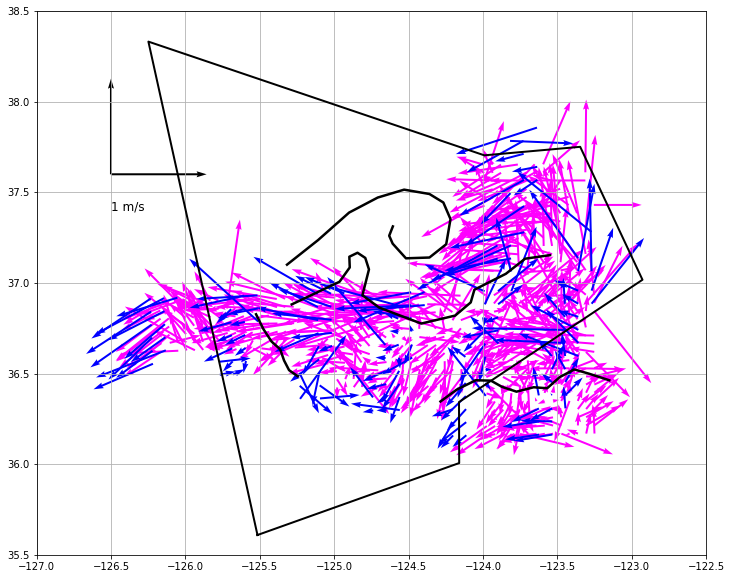

In [10]:
# Figure 

KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]



# Définir les coordonnées des points
front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]



thick=0.003
nb_pt=1
scale_quiver=7
width_front=2.5
# plt.subplot()
plt.figure(figsize=(12, 10))

# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k',linewidth=2)
# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer les points
# plt.figure(figsize=(10, 8))

# Tracer front1
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k',linewidth=width_front)

# Tracer front2
x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k',linewidth=width_front)

# Tracer front3
x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k',linewidth=width_front)

# Tracer front4
x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k',linewidth=width_front)

##############################################################################################################

############################################# Ntile = 8######################################################
############################################ taille 500 #####################################################
# #BF
plt.quiver(lon_BF_8[::nb_pt], lat_BF_8[::nb_pt], U_BF_8[::nb_pt], V_BF_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
#CF
plt.quiver(lon_CF_8[::nb_pt], lat_CF_8[::nb_pt], U_CF_8[::nb_pt], V_CF_8[::nb_pt], scale=scale_quiver,width=thick, color='magenta')

#DF
plt.quiver(lon_DF_8[::nb_pt], lat_DF_8[::nb_pt], U_DF_8[::nb_pt], V_DF_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

#DG
plt.quiver(lon_DG_8[::nb_pt], lat_DG_8[::nb_pt], U_DG_8[::nb_pt], V_DG_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

############################################ taille 800 #####################################################

# BF
plt.quiver(lon_BF_82[::nb_pt], lat_BF_82[::nb_pt], U_BF_82[::nb_pt], V_BF_82[::nb_pt], scale=scale_quiver, width=thick, color='blue')
#CF
plt.quiver(lon_CF_82[::nb_pt], lat_CF_82[::nb_pt], U_CF_82[::nb_pt], V_CF_82[::nb_pt], scale=scale_quiver,width=thick, color='blue')

#DF
plt.quiver(lon_DF_82[::nb_pt], lat_DF_82[::nb_pt], U_DF_82[::nb_pt], V_DF_82[::nb_pt], scale=scale_quiver, width=thick, color='blue')

#DG
plt.quiver(lon_DG_82[::nb_pt], lat_DG_82[::nb_pt], U_DG_82[::nb_pt], V_DG_82[::nb_pt], scale=scale_quiver, width=thick, color='blue')





############################################# Ntile = 16######################################################
# ##BF
# plt.quiver(lon_BF_16[::nb_pt], lat_BF_16[::nb_pt], U_BF_16[::nb_pt], V_BF_16[::nb_pt], scale=scale_quiver, width=thick, color='green')
# #CF
# plt.quiver(lon_CF_16[::nb_pt], lat_CF_16[::nb_pt], U_CF_16[::nb_pt], V_CF_16[::nb_pt], scale=scale_quiver,width=thick, color='green')

# #DF
# plt.quiver(lon_DF_16[::nb_pt], lat_DF_16[::nb_pt], U_DF_16[::nb_pt], V_DF_16[::nb_pt], scale=scale_quiver, width=thick, color='green')

# #DG
# plt.quiver(lon_DG_16[::nb_pt], lat_DG_16[::nb_pt], U_DG_16[::nb_pt], V_DG_16[::nb_pt], scale=scale_quiver, width=thick, color='green')


#### Scale

plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')
plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

plt.xlim(-127, -122.5)
plt.ylim(35.5, 38.5)
plt.grid(True)

plt.show()



### Diffrentes longueurs d'ondes

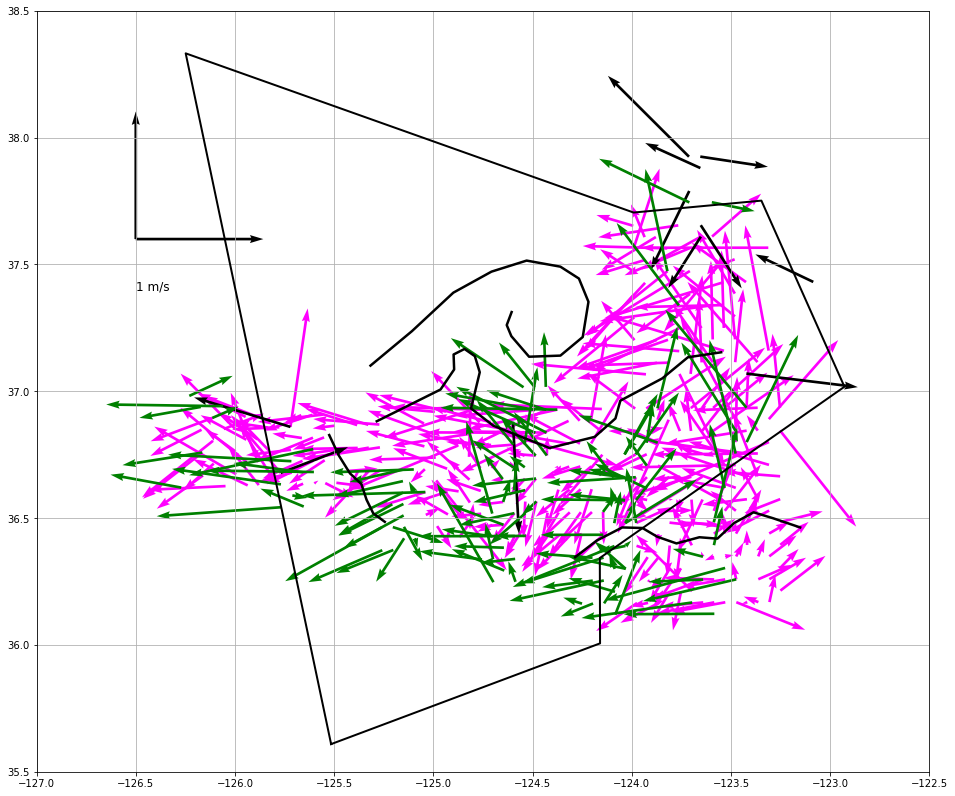

In [5]:
# Figure 

KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]



# Définir les coordonnées des points
front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]



thick=0.003
nb_pt=2
scale_quiver=7
width_front=2.5
# plt.subplot()
plt.figure(figsize=(16, 14))

# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k',linewidth=2)
# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer les points
# plt.figure(figsize=(10, 8))

# Tracer front1
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k',linewidth=width_front)

# Tracer front2
x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k',linewidth=width_front)

# Tracer front3
x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k',linewidth=width_front)

# Tracer front4
x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k',linewidth=width_front)

##############################################################################################################

############################################# Ntile = 8######################################################
############################################ taille 500 #####################################################
# #BF
plt.quiver(lon_BF_8[::nb_pt], lat_BF_8[::nb_pt], U_BF_8[::nb_pt], V_BF_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
#CF
plt.quiver(lon_CF_8[::nb_pt], lat_CF_8[::nb_pt], U_CF_8[::nb_pt], V_CF_8[::nb_pt], scale=scale_quiver,width=thick, color='magenta')

#DF
plt.quiver(lon_DF_8[::nb_pt], lat_DF_8[::nb_pt], U_DF_8[::nb_pt], V_DF_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

#DG
plt.quiver(lon_DG_8[::nb_pt], lat_DG_8[::nb_pt], U_DG_8[::nb_pt], V_DG_8[::nb_pt], scale=scale_quiver, width=thick, color='magenta')

#########################################################################################################

# BF
plt.quiver(lon_BF_83, lat_BF_83, U_BF_83, V_BF_83, scale=scale_quiver, width=thick, color='black')
#CF
plt.quiver(lon_CF_83, lat_CF_83, U_CF_83, V_CF_83, scale=scale_quiver,width=thick, color='black')

#DF
plt.quiver(lon_DF_83, lat_DF_83, U_DF_83, V_DF_83, scale=scale_quiver, width=thick, color='black')

#DG
plt.quiver(lon_DG_83, lat_DG_83, U_DG_83, V_DG_83, scale=scale_quiver, width=thick, color='black')

#########################################################################################################

# BF
plt.quiver(lon_BF_84[::nb_pt], lat_BF_84[::nb_pt], U_BF_84[::nb_pt], V_BF_84[::nb_pt], scale=scale_quiver, width=thick, color='green')
#CF
plt.quiver(lon_CF_84[::nb_pt], lat_CF_84[::nb_pt], U_CF_84[::nb_pt], V_CF_84[::nb_pt], scale=scale_quiver,width=thick, color='green')

#DF
plt.quiver(lon_DF_84[::nb_pt], lat_DF_84[::nb_pt], U_DF_84[::nb_pt], V_DF_84[::nb_pt], scale=scale_quiver, width=thick, color='green')

#DG
plt.quiver(lon_DG_84[::nb_pt], lat_DG_84[::nb_pt], U_DG_84[::nb_pt], V_DG_84[::nb_pt], scale=scale_quiver, width=thick, color='green')


#### Scale

plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')
plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

plt.xlim(-127, -122.5)
plt.ylim(35.5, 38.5)
plt.grid(True)

plt.show()

## Difference en magnitude

In [6]:
def filter_data(lon, lat, C):
    mask = (lon != 0) & (lat != 0)
    return lon[mask], lat[mask], C[mask]

lon_BF_8, lat_BF_8, C_BF_8 = filter_data(lon_BF_8, lat_BF_8, C_BF_8)
lon_CF_8, lat_CF_8, C_CF_8 = filter_data(lon_CF_8, lat_CF_8, C_CF_8)
lon_DF_8, lat_DF_8, C_DF_8 = filter_data(lon_DF_8, lat_DF_8, C_DF_8)
lon_DG_8, lat_DG_8, C_DG_8 = filter_data(lon_DG_8, lat_DG_8, C_DG_8)

# lon_BF_83, lat_BF_83, C_BF_83 = filter_data(lon_BF_83, lat_BF_83, C_BF_83)
# lon_CF_83, lat_CF_83, C_CF_83 = filter_data(lon_CF_83, lat_CF_83, C_CF_83)
# lon_DF_83, lat_DF_83, C_DF_83 = filter_data(lon_DF_83, lat_DF_83, C_DF_83)
# lon_DG_83, lat_DG_83, C_DG_83 = filter_data(lon_DG_83, lat_DG_83, C_DG_83)

# lon_BF_84, lat_BF_84, C_BF_84 = filter_data(lon_BF_84, lat_BF_84, C_BF_84)
# lon_CF_84, lat_CF_84, C_CF_84 = filter_data(lon_CF_84, lat_CF_84, C_CF_84)
# lon_DF_84, lat_DF_84, C_DF_84 = filter_data(lon_DF_84, lat_DF_84, C_DF_84)
# lon_DG_84, lat_DG_84, C_DG_84 = filter_data(lon_DG_84, lat_DG_84, C_DG_84)


# lon_BF_16, lat_BF_16, C_BF_16 = filter_data(lon_BF_16, lat_BF_16, C_BF_16)
# lon_CF_16, lat_CF_16, C_CF_16 = filter_data(lon_CF_16, lat_CF_16, C_CF_16)
# lon_DF_16, lat_DF_16, C_DF_16 = filter_data(lon_DF_16, lat_DF_16, C_DF_16)
# lon_DG_16, lat_DG_16, C_DG_16 = filter_data(lon_DG_16, lat_DG_16, C_DG_16)


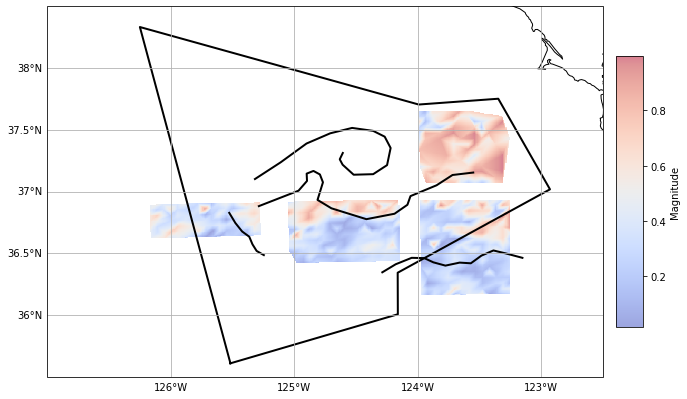

In [7]:
# Grille pour les données
lon_grid = np.linspace(-127, -122.5, 500)
lat_grid = np.linspace(35.5, 38.5, 500)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# Interpolation des données sur la grille
C_BF8_grid = griddata((lon_BF_8, lat_BF_8), C_BF_8, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
C_CF8_grid = griddata((lon_CF_8, lat_CF_8), C_CF_8, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
C_DF8_grid = griddata((lon_DF_8, lat_DF_8), C_DF_8, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
C_DG8_grid = griddata((lon_DG_8, lat_DG_8), C_DG_8, (lon_grid, lat_grid), method='linear', fill_value=np.nan)

# Trouver les valeurs minimales et maximales pour la normalisation
vmin = min(np.nanmin(C_BF8_grid), np.nanmin(C_CF8_grid), np.nanmin(C_DF8_grid), np.nanmin(C_DG8_grid))
vmax = max(np.nanmax(C_BF8_grid), np.nanmax(C_CF8_grid), np.nanmax(C_DF8_grid), np.nanmax(C_DG8_grid))

# Créer la carte avec Cartopy
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Tracer les données interpolées sur la même carte
cmap = 'coolwarm'
shad = 'auto'
c1 = ax.pcolormesh(lon_grid, lat_grid, C_BF8_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
c2 = ax.pcolormesh(lon_grid, lat_grid, C_CF8_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
c3 = ax.pcolormesh(lon_grid, lat_grid, C_DF8_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
c4 = ax.pcolormesh(lon_grid, lat_grid, C_DG8_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)

cbar = plt.colorbar(c1, ax=ax, orientation='vertical', pad=0.02, shrink=0.5, aspect=10)
cbar.set_label('Magnitude')

# Données KML
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

# Fronts
front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]



# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k', linewidth=2)

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer les fronts
width_front = 2
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front)

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front)

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front)

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front)
# Ajouter une grille
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Ajouter des titres et labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_xlim(-127, -122.5)
ax.set_ylim(35.5, 38.5)

# Afficher le plot
plt.show()


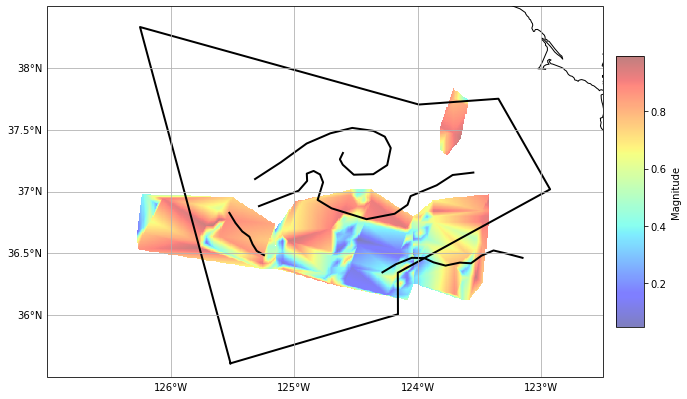

In [53]:
# Grille pour les données
lon_grid = np.linspace(-127, -122.5, 500)
lat_grid = np.linspace(35.5, 38.5, 500)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# Interpolation des données sur la grille
C_BF84_grid = griddata((lon_BF_84, lat_BF_84), C_BF_84, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
C_CF84_grid = griddata((lon_CF_84, lat_CF_84), C_CF_84, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
C_DF84_grid = griddata((lon_DF_84, lat_DF_84), C_DF_84, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
C_DG84_grid = griddata((lon_DG_84, lat_DG_84), C_DG_84, (lon_grid, lat_grid), method='linear', fill_value=np.nan)

# Trouver les valeurs minimales et maximales pour la normalisation
vmin = min(np.nanmin(C_BF84_grid), np.nanmin(C_CF84_grid), np.nanmin(C_DF84_grid), np.nanmin(C_DG84_grid))
vmax = max(np.nanmax(C_BF84_grid), np.nanmax(C_CF84_grid), np.nanmax(C_DF84_grid), np.nanmax(C_DG84_grid))

# Créer la carte avec Cartopy
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Tracer les données interpolées sur la même carte
cmap = 'jet'
shad = 'auto'
c1 = ax.pcolormesh(lon_grid, lat_grid, C_BF84_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
c2 = ax.pcolormesh(lon_grid, lat_grid, C_CF84_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
c3 = ax.pcolormesh(lon_grid, lat_grid, C_DF84_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
c4 = ax.pcolormesh(lon_grid, lat_grid, C_DG84_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)

cbar = plt.colorbar(c1, ax=ax, orientation='vertical', pad=0.02, shrink=0.5, aspect=10)
cbar.set_label('Magnitude')

# Données KML
KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]

# Fronts
front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]



# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k', linewidth=2)

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer les fronts
width_front = 2
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front)

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front)

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front)

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front)
# Ajouter une grille
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Ajouter des titres et labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_xlim(-127, -122.5)
ax.set_ylim(35.5, 38.5)

# Afficher le plot
plt.show()


[36.6233505  36.66835661 36.71336229 36.75836755 36.80337239 36.84837681
 36.89338081 36.66982788 36.71483596 36.75984362 36.80485087 36.8498577
 36.8948641  36.62626213 36.67127298 36.85131225 36.89632102 36.62767876
 36.67269192 36.71770468 36.76271702 36.80772895 36.85274046 36.62906926
 36.67408469 36.71909971 36.76411433 36.80912853 36.85414233 36.89915571
 36.63043362 36.67545128 36.72046853 36.76548538 36.81050181 36.85551784
 36.90053347 36.67679168 36.72181112 36.76683015 36.81184878 36.85686701
 36.90188482 36.63308391 36.67810589 36.81316943 36.85818981 36.90320978
 36.63436982 36.67939391 36.72441759 36.76944088 36.81446376 36.85948624
 36.63562958 36.68065572 36.72568147 36.77070681 36.81573176 36.86075631
 36.90578045 36.63686318 36.68189133 36.72691909 36.77194645 36.81697342
 36.86199999 36.90702617 36.63807061 36.68310073 36.72813046 36.7731598
 36.81818875 36.8632173  36.90824545 36.63925186 36.81937773 36.86440821
 36.90943831 36.64040694 36.68544088 36.73047443 36.7

In [41]:

# # Grille pour les données
# lon_grid = np.linspace(-127, -122.5, 500)
# lat_grid = np.linspace(35.5, 38.5, 500)
# lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# # Interpolation des données sur la grille
# C_BF16_grid = griddata((lon_BF_16, lat_BF_16), C_BF_16, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
# C_CF16_grid = griddata((lon_CF_16, lat_CF_16), C_CF_16, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
# C_DF16_grid = griddata((lon_DF_16, lat_DF_16), C_DF_16, (lon_grid, lat_grid), method='linear', fill_value=np.nan)
# C_DG16_grid = griddata((lon_DG_16, lat_DG_16), C_DG_16, (lon_grid, lat_grid), method='linear', fill_value=np.nan)

# # Trouver les valeurs minimales et maximales pour la normalisation
# vmin = min(np.nanmin(C_BF16_grid), np.nanmin(C_CF16_grid), np.nanmin(C_DF16_grid), np.nanmin(C_DG16_grid))
# vmax = max(np.nanmax(C_BF16_grid), np.nanmax(C_CF16_grid), np.nanmax(C_DF16_grid), np.nanmax(C_DG16_grid))

# # Créer la carte avec Cartopy
# fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.set_global()
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)

# # Tracer les données interpolées sur la même carte
# cmap = 'jet'
# shad = 'auto'
# c1 = ax.pcolormesh(lon_grid, lat_grid, C_BF16_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
# c2 = ax.pcolormesh(lon_grid, lat_grid, C_CF16_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
# c3 = ax.pcolormesh(lon_grid, lat_grid, C_DF16_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)
# c4 = ax.pcolormesh(lon_grid, lat_grid, C_DG16_grid, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax, alpha=0.5, shading=shad)

# cbar = plt.colorbar(c1, ax=ax, orientation='vertical', pad=0.02, shrink=0.5, aspect=10)
# cbar.set_label('Magnitude')

# # Données KML
# KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
# kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
# x = [point[0] for point in kml]
# y = [point[1] for point in kml]

# # Fronts
# front1 = [
#     [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
#     [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
#     [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
#     [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
#     [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
#     [-123.5495, 37.15375]
# ]

# front2 = [
#     [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
#     [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
#     [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
#     [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
#     [-124.63028, 37.260938], [-124.60556, 37.312291]
# ]

# front3 = [
#     [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
#     [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
#     [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
#     [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
# ]

# front4 = [
#     [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
#     [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
#     [-125.244827, 36.485349]
# ]



# # Tracé des lignes définies par les coordonnées KML
# plt.plot(x, y, 'k', linewidth=2)

# # Fonction pour extraire les coordonnées x et y
# def extract_coords(front):
#     x_coords = [point[0] for point in front]
#     y_coords = [point[1] for point in front]
#     return x_coords, y_coords

# # Tracer les fronts
# width_front = 2
# x1, y1 = extract_coords(front1)
# plt.plot(x1, y1, 'k', linewidth=width_front)

# x2, y2 = extract_coords(front2)
# plt.plot(x2, y2, 'k', linewidth=width_front)

# x3, y3 = extract_coords(front3)
# plt.plot(x3, y3, 'k', linewidth=width_front)

# x4, y4 = extract_coords(front4)
# plt.plot(x4, y4, 'k', linewidth=width_front)
# # Ajouter une grille
# gl = ax.gridlines(draw_labels=True)
# gl.top_labels = False
# gl.right_labels = False

# # Ajouter des titres et labels
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# ax.set_xlim(-127, -122.5)
# ax.set_ylim(35.5, 38.5)

# # Afficher le plot
# plt.show()
